# Séance nº7 : intégration numérique

Intégration numérique de la masse de la Terre et du temps de trajet des ondes P avec le modèle PREM

 Le modèle ‘*Preliminary Reference Earth Model*’ (Dziewonski & Anderson, 1981) fournit des profils verticaux de vitesse des ondes P et de densité par intervalles de profondeur, pour un modèle de Terre axisymétrique (1D).

 On se propose d’utiliser ce modèle pour (1) calculer la masse de la Terre, (2) en déduire la valeur de la gravité g en surface, et (3) calculer le temps de trajet des ondes P qui traversent la Terre exactement par son centre.

## 3. Ecrire des algorithmes et programmes pour résoudre les étapes suivantes :

1. lire les profils de vitesse et densité dans le fichier du modèle PREM ;

2. réaliser une boucle sur les profondeurs avec un nombre N d’intervalles ;

3. pour chaque intervalle de profondeur : calculer rho(z), dm(z), et le temps de trajet dt des ondes P ;

4. ajouter ces dm et dt pour calculer la masse de la Terre et le temps de trajet des ondes P ;

5. calculer g à la surface de la Terre : $g = G.M/R^2$ ($G = 6.67\times10^{-11}$ $N/m^2/kg^2$)

Propositions : essayer de procéder par étapes pour séparer les problèmes. Chaque étape doit être validée avant de passer à la suivante.

**Etape 1** : on utilise des valeurs moyennes de Vp et rho dans les calculs

**Etape 2** : créer les structures fonctions qui renvoient des valeurs constantes (moyennes) de Vp et rho, quelle que soit la profondeur z. On vérifie (important avant de passer à la suite) que l’on obtient les mêmes valeurs pour le temps de trajet et la masse totale que précédemment.

**Etape 3** : on prend en compte les données du modèle PREM pour calculer Vp et rho, mais pas encore de manière exacte (ceci afin de séparer la difficulté de choisir les coefficients correspondants à la profondeur correcte). On lit ces données dans le fichier PREM\_table1.txt (\*), et on modifie les fonctions qui calculent Vp et rho de façon à utiliser le formalisme du modèle PREM. On peut utiliser les valeurs du premier intervalle, et on doit obtenir des valeurs cohérentes pour le noyau de la Terre.
### Fait au TP6

In [3]:
###code du TP6


import numpy as np
import matplotlib.pyplot as plt

zzb,zzr,rho,vp=np.loadtxt('../TP6/PREM/PREM_table1.txt',skiprows=2,usecols=(0,1,2,6),unpack=True)


zzb*=1e3 #m
zzr*=1e3 #m
rho*=1e3 #kg/m3
vp*=1e3 #m/s

# rayon terrestre en m
rt = 6371e3;

# initialisation masse m en kg, temps trajet en s
mt = 0;
tp = 0;

#résolution verticale
dz=1e3 #m

# boucle verticale de dz a 6371km
# compteur ii pour conserver profil de d (et m, g)
rho_i=np.zeros(len(np.arange(dz,rt,dz)))
vp_i=np.zeros(len(np.arange(dz,rt,dz)))

ii=-1
for zz in np.arange(dz,rt,dz):
    ii+=1
    for nn in np.arange(0,len(zzb)):
        if zz>=zzb[nn] and zz<zzr[nn]:
            rho_i[ii]=rho[nn]
            vp_i[ii]=vp[nn]
            
    dm = 4*np.pi*zz**2*rho_i[ii]*dz
    mt+=dm

    dt=dz/vp_i[ii]
    tp+=dt
    
print('masse terre=',mt)
print('temps de propagation=',tp/60,'minutes')

g= 6.67e-11*mt/rt**2

print('gravité g en m/s2=',g)



masse terre= 9.002244431857505e+24
temps de propagation= 11.05975955998161 minutes
gravité g en m/s2= 14.793176012689928


**Etape 4** : on modifie les fonctions pour calculer les valeurs Vp et rho données par PREM (choix de l’intervalle de profondeur en fonction de z avec une boucle *while *ou* for*). On doit obtenir les vraies valeurs pour le temps de trajet ($\approx 10min$ depuis le centre de la terre) et la masse de la Terre ($\approx 5.97\times10^{24}$kg soit $g\approx9.81 m/s^2$).

Le fichier PREM_table1.txt contient les 10 colonnes suivantes :
intervalle défini par rayon min et max

4 coeff. de densité et 4 coeff. de vitesse qui permettent de former des polynômes de degré 3 du rayon normalisé x=r/ra qui permettent de calculer la masse volumique (rho en g/cm3) et la vitesse des ones P ($V_P$ en km/s)  

polynome de degré 3:   
	$rho = dens0 + dens1*x -dens2*x^2 + dens3*x^3 [g/cm3]$,  
	et $Vp = vp0 + vp1*x vp2*x^2 + vp3*x^3 [km/s]$.

masse terre= 5.971945852426988e+24
temps de propagation= 10.117836318431552 minutes
gravité g en m/s2= 9.81355780793627


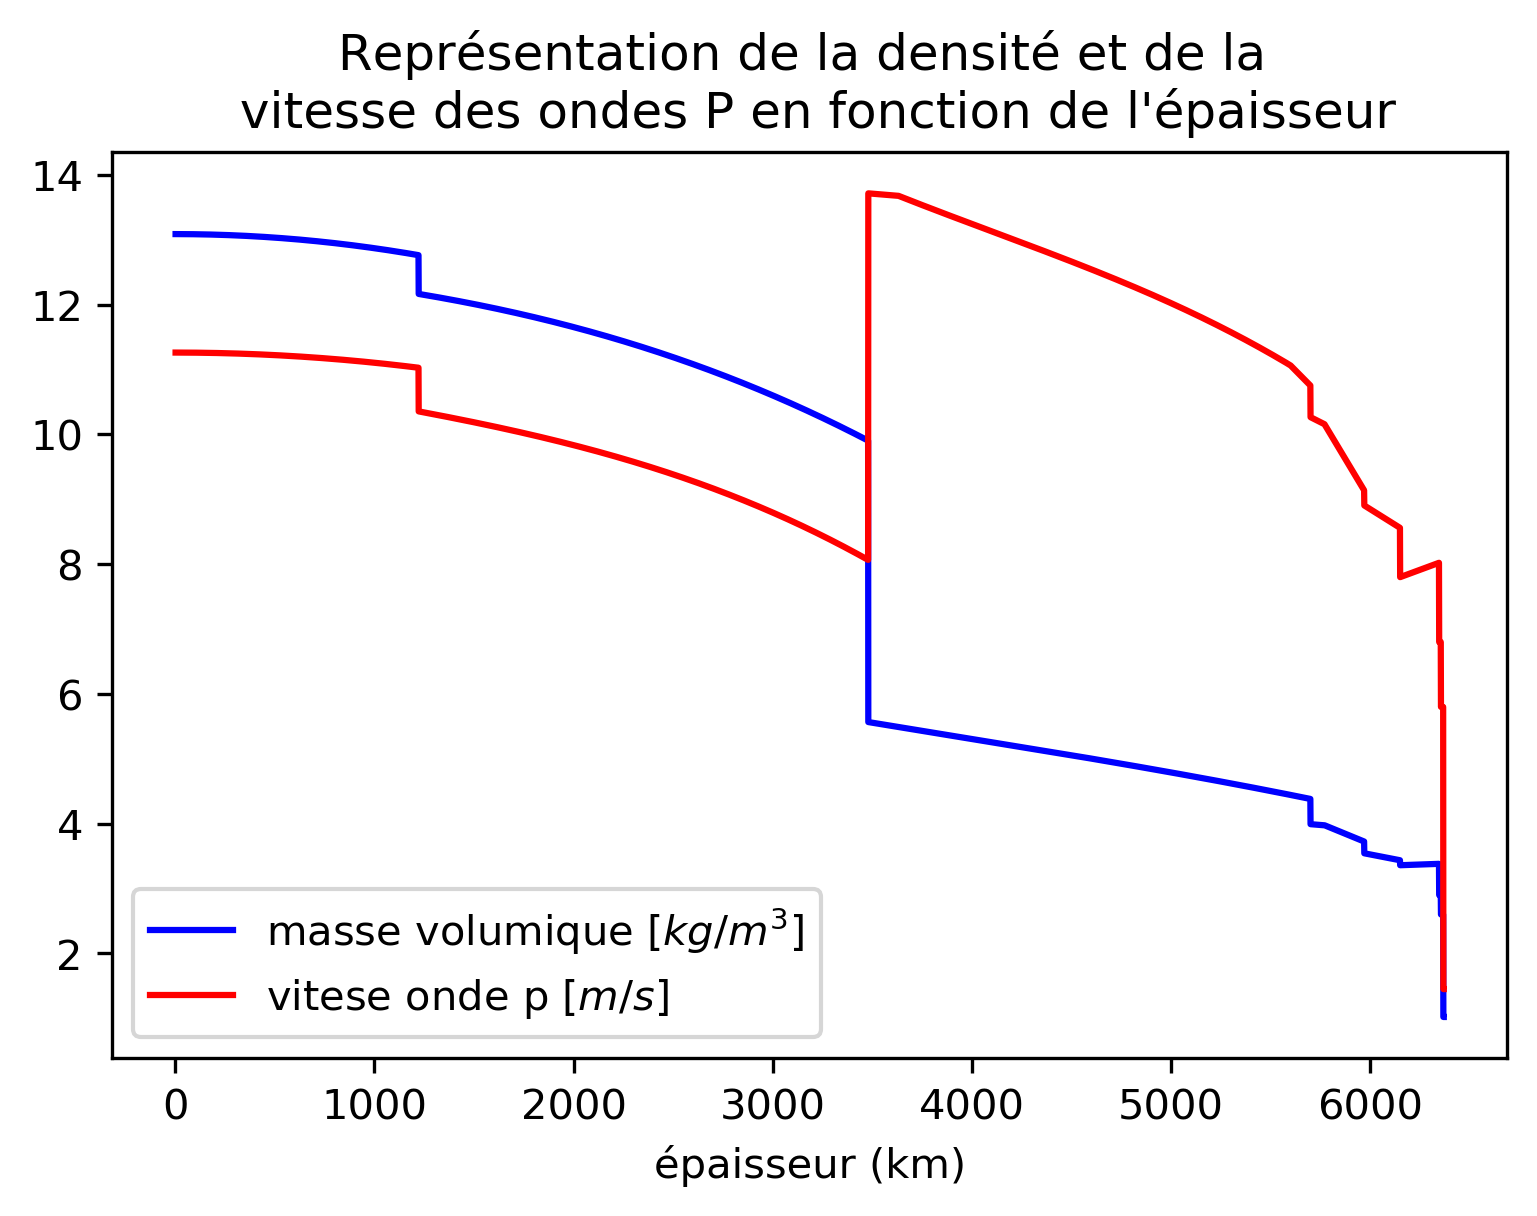

In [12]:
radius1,radius2,dens0,dens1,dens2,dens3,Vp0,vp1,vp2,vp3=np.loadtxt('../TP6/PREM/PREM_table1.txt',skiprows=2,unpack=True)*1e3;
#je charge l'ensemble des variables du fichier et je les multiplie par 1e3 pour être homogène sur 
#mes unité

#la différence avec la formulation précédente est la définition du rho. Nous allons maintenant appliquer
#les polynomes de degré 3

# rayon terrestre en m
rt = 6371e3;

# initialisation masse m en kg, temps trajet en s
mt = 0;
tp = 0;

#résolution verticale
dz=1e3 #m

# boucle verticale de dz a 6371km
# compteur ii pour conserver profil de d (et m, g)
rho_i=np.zeros(len(np.arange(dz,rt,dz)))
vp_i=np.zeros(len(np.arange(dz,rt,dz)))

ii=-1
for zz in np.arange(dz,rt,dz):
    ii+=1
    x=zz/rt; #normalisation du rayon
   
    for nn in np.arange(0,len(radius1)):
        if zz>=radius1[nn] and zz<radius2[nn]:
            rho_i[ii]=dens0[nn]+dens1[nn]*x+dens2[nn]*x**2+dens3[nn]*x**3 #calcul de rho
            
            vp_i[ii]=Vp0[nn]+vp1[nn]*x+vp2[nn]*x**2+vp3[nn]*x**3 #calcul de vp
            
    dm = 4*np.pi*zz**2*rho_i[ii]*dz
    mt+=dm

    dt=dz/vp_i[ii]
    tp+=dt
    
print('masse terre=',mt)
print('temps de propagation=',tp/60,'minutes')

#calcul de la gravité
g= 6.67e-11*mt/rt**2

print('gravité g en m/s2=',g) 


plt.figure(1,dpi=300)
plt.plot(np.arange(dz,rt,dz)/1e3,rho_i/1e3,'-b',label='masse volumique $[kg/m^3]$')
plt.plot(np.arange(dz,rt,dz)/1e3,vp_i/1e3,'-r',label='vitese onde p $[m/s]$')
plt.xlabel('épaisseur (km)')
plt.legend()
plt.title('Représentation de la densité et de la \n vitesse des ondes P en fonction de l\'épaisseur') #\n permet le retour à la ligne
# \' permet de mettre un apostrophe
plt.show()

